# Başlayalım

Kaggleda düzenlenen bir müsabaka olan dogs vs cats müsabakasında kullanılan veri ile bir **konvolisyonel sinir ağı/cnn** modeli/çalışması yapacağız.

Önce veriyi indirmemiz lazım.Veriyi zip dosyasından çekeceğiz.

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-08-15 11:19:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  88.4MB/s    in 0.7s    

2020-08-15 11:19:39 (88.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Colabda çalışacaklar için veri yine **tmp** klasörüne indi **zip** halinde.Şimdi o zipi açacağız.

In [ ]:
import os
import zipfile

local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ref =zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("/tmp")
zip_ref.close()

Yine **tmp** klasörğne bakarsak orda dosya halinde **cats_and_dogs_filtered** halinde bir doysa göreceksiniz.

Şimdi **directory/yön/klavuz** işlemlerini yapalım.Bu işlemi verilere tam manasıyla erişebilmek için yapıyoruz.

In [ ]:
ana_dir = "/tmp/cats_and_dogs_filtered/"

train_dir = os.path.join(ana_dir,"train")
valid_dir = os.path.join(ana_dir,"validation")

train_cats_dir = os.path.join(train_dir,"cats")
train_dogs_dir =os.path.join(train_dir,"dogs")

valid_cats_dir =os.path.join(valid_dir,"cats")
valid_dogs_dir =os.path.join(valid_dir,"dogs")

Şimdi de ilgili yerlerdeki verilerin isimlerine bakalım

In [ ]:
print(os.listdir(train_cats_dir)[:10])
print(os.listdir(train_dogs_dir)[:10])
print(os.listdir(valid_cats_dir)[:10])
print(os.listdir(valid_dogs_dir)[:10])

['cat.721.jpg', 'cat.711.jpg', 'cat.651.jpg', 'cat.4.jpg', 'cat.836.jpg', 'cat.669.jpg', 'cat.166.jpg', 'cat.152.jpg', 'cat.410.jpg', 'cat.402.jpg']
['dog.612.jpg', 'dog.806.jpg', 'dog.998.jpg', 'dog.431.jpg', 'dog.911.jpg', 'dog.211.jpg', 'dog.907.jpg', 'dog.293.jpg', 'dog.299.jpg', 'dog.535.jpg']
['cat.2054.jpg', 'cat.2007.jpg', 'cat.2216.jpg', 'cat.2301.jpg', 'cat.2333.jpg', 'cat.2149.jpg', 'cat.2227.jpg', 'cat.2287.jpg', 'cat.2471.jpg', 'cat.2235.jpg']
['dog.2029.jpg', 'dog.2224.jpg', 'dog.2083.jpg', 'dog.2354.jpg', 'dog.2170.jpg', 'dog.2194.jpg', 'dog.2210.jpg', 'dog.2442.jpg', 'dog.2102.jpg', 'dog.2493.jpg']


Ayrıca her bölümde ne kadar verimiz olduğuna da bakalım

In [ ]:
print("train_cats:",len(os.listdir(train_cats_dir)))
print("train_dogs:",len(os.listdir(train_dogs_dir)))
print("valid_cats:",len(os.listdir(valid_cats_dir)))
print("valid_dogs:",len(os.listdir(valid_dogs_dir)))

train_cats: 1000
train_dogs: 1000
valid_cats: 500
valid_dogs: 500


Ek olarak verimizden bazı verileri görelim.Bunun için matplotlib kütüphanesinden faydalanacağız.

Bu kod satırlarını direkt kopyala/yapıştır yaptım

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

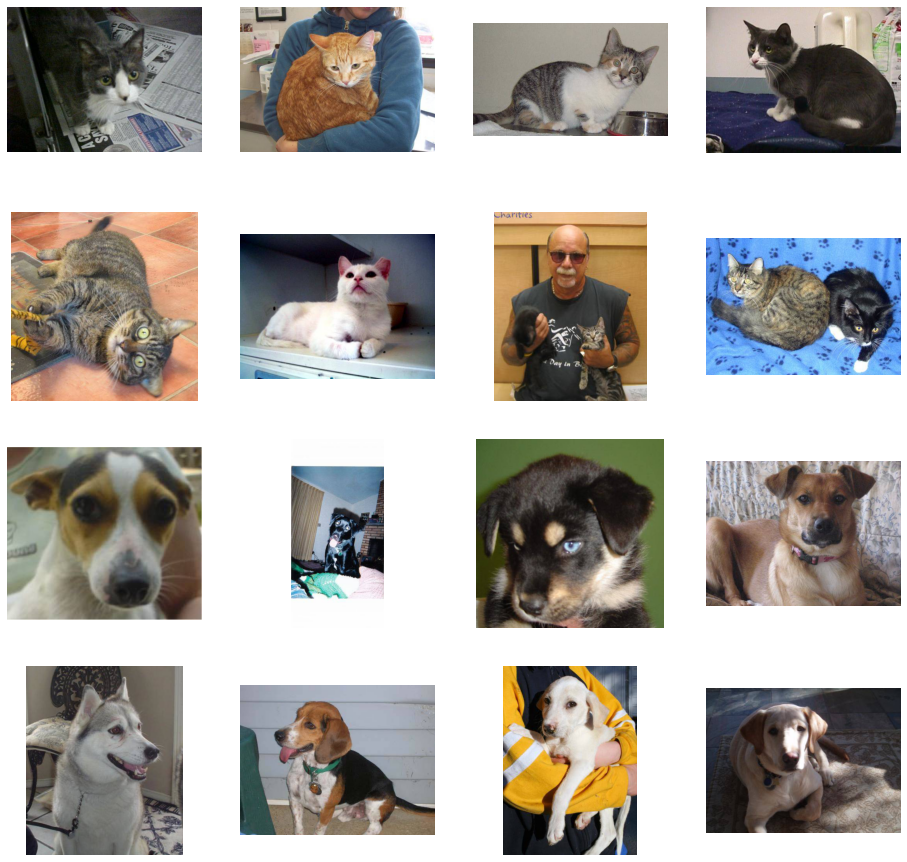

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Modelimizi kuralım

In [ ]:
import tensorflow as tf

Gelen verilerin şekli (150,150) ve renkli oldukları için **input_sahepe=(150,150,3)** olacak.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

# Modeli derleyelim

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Veri ön hazırlığı

Bildiğiniz gibi, sinir ağlarına giren veriler, ağ tarafından işlenmeye daha uygun hale getirmek için genellikle bir şekilde **normalleştirilmelidir/normalization**. Bizim durumumuzda, piksel değerlerini [0, 1] aralığında olacak şekilde normalleştirerek görüntülerimizi önceden işleyeceğiz (orijinal olarak tüm değerler [0, 255] aralığındadır. )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =ImageDataGenerator(rescale=(1.0/255.0))
valid_datagen =ImageDataGenerator(rescale=(1.0/255.0))

train_generator=train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode="binary",
    target_size=(150,150)
)

valid_generator =valid_datagen.flow_from_directory(
    valid_dir,
    batch_size=20,
    class_mode="binary",
    target_size=(150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Önemli nokta

**Directory/klavuz** öyle bir yapıya sahip ki verileri etiketlemeye gerek yok. **Kedi** resimlerinin olduğu klasörün adı **Cats** olduğu için o kalsördeki veriler otomatik olarak öyle etiketlenecektir.

Çok iyi bir kolaylık.

# Modelimizi Fitleyelim

In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=15,
    steps_per_epoch=100,
    validation_steps=50,
    verbose=1
)

Epoch 1/15
100/100 [==============================] - 8s 85ms/step - loss: 0.0274 - accuracy: 0.9945 - val_loss: 3.3540 - val_accuracy: 0.6970
Epoch 2/15
100/100 [==============================] - 8s 85ms/step - loss: 0.0590 - accuracy: 0.9925 - val_loss: 3.2402 - val_accuracy: 0.7070
Epoch 3/15
100/100 [==============================] - 9s 86ms/step - loss: 3.5262e-05 - accuracy: 1.0000 - val_loss: 4.4359 - val_accuracy: 0.6960
Epoch 4/15
100/100 [==============================] - 8s 83ms/step - loss: 0.0394 - accuracy: 0.9910 - val_loss: 3.7551 - val_accuracy: 0.6910
Epoch 5/15
100/100 [==============================] - 8s 83ms/step - loss: 0.0178 - accuracy: 0.9955 - val_loss: 3.5111 - val_accuracy: 0.7050
Epoch 6/15
100/100 [==============================] - 8s 85ms/step - loss: 3.2858e-05 - accuracy: 1.0000 - val_loss: 3.9687 - val_accuracy: 0.7070
Epoch 7/15
100/100 [==============================] - 8s 82ms/step - loss: 0.0456 - accuracy: 0.9935 - val_loss: 3.4095 - val_accuracy

### Şimdi modelimiz başka bir veri üzerinden test edelim

Colab için dışardan yükelidğimiz bir veri **dict** yapısı şeklinde gelir.

Ve bu nesnenin ilk **anahtarı/key'i** verinin kendisidir.

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  images=np.expand_dims(x, axis=0)
  
  classes = model.predict(images,batch_size=10)
  print(classes)
  print(type(classes))
  print(classes[0])
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving kedi41.jpg to kedi41.jpg
[[0.]]
<class 'numpy.ndarray'>
[0.]
kedi41.jpg is a cat


**x=image.img_to_array(img)** yaptığımızda veri her haliyle bir array'e dönüşür.

**x=np.expand_dims(x, axis=0)** kodu ile tüm sayısal içerikleri **x eksenine** yayarız.Çünkü işlem böyle olur.